In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)

Populating the interactive namespace from numpy and matplotlib


In [42]:
data = pd.read_csv('compTimes.log')
minIdOfOwnInstance = 10
data.describe()

,instance_id,steps,optLevel,compTime
count,116.000000,116.000000,116.000000,116.000000
mean,8.241379,8.379310,1.500000,148.405914
std,4.208936,5.427234,1.122884,620.421169
min,1.000000,1.000000,0.000000,2.086000
25%,5.000000,3.000000,0.750000,3.740750
50%,8.000000,8.000000,1.500000,5.107000
75%,12.000000,14.000000,2.250000,8.260000
max,15.000000,17.000000,3.000000,3610.869000


In [43]:
data.head()

,instance_id,steps,optLevel,foundSolution,compTime
0,5,10,0,True,5.379
1,5,10,1,True,6.037
2,5,10,2,True,6.337
3,5,10,3,True,8.037
4,8,15,0,False,256.892


In [44]:
print(data.dropna().groupby('optLevel').agg({'compTime':['mean','std']}).to_latex())
#data.dropna().groupby('optLevel').agg({'compTime':['mean','std'],'solutionLength':['mean']}).to_latex()


\begin{tabular}{lrr}
\toprule
{} & \multicolumn{2}{l}{compTime} \\
{} &        mean &         std \\
optLevel &             &             \\
\midrule
0        &  333.179310 &  933.252549 \\
1        &    6.215207 &    5.014184 \\
2        &    7.041517 &    4.910680 \\
3        &  247.187621 &  789.187610 \\
\bottomrule
\end{tabular}



In [49]:
data.groupby(['instance_id']).agg({'compTime':['min','max','mean','std']})


compTime                                    
                 min       max         mean          std
instance_id                                             
1              2.086     2.397     2.264500     0.131931
2              2.578     3.770     3.042750     0.407871
3              3.640     5.497     4.403750     0.607229
4              4.284     7.567     5.583625     1.091409
5              4.793     8.037     6.235000     1.038451
6              5.498     9.278     7.434625     1.309873
7              6.133    70.059    19.475750    22.897421
8              7.999   554.114   144.257875   204.345307
9              8.247  1013.062   275.652500   358.925130
10             2.778     4.816     3.667500     0.698544
11             2.981     4.524     3.530875     0.551904
12             3.468     4.497     3.853000     0.356898
13             3.377     4.349     3.939375     0.332759
14             4.615     6.680     5.478625     0.774889
15            14.448  3610.869  1664.198250  1800.290293

In [50]:
print(data.to_latex())

\begin{tabular}{lrrrlr}
\toprule
{} &  instance\_id &  steps &  optLevel &  foundSolution &  compTime \\
\midrule
0   &            5 &     10 &         0 &           True &     5.379 \\
1   &            5 &     10 &         1 &           True &     6.037 \\
2   &            5 &     10 &         2 &           True &     6.337 \\
3   &            5 &     10 &         3 &           True &     8.037 \\
4   &            8 &     15 &         0 &          False &   256.892 \\
5   &            8 &     15 &         1 &          False &     7.999 \\
6   &            8 &     15 &         2 &          False &     9.863 \\
7   &            8 &     15 &         3 &          False &    11.588 \\
8   &            7 &     15 &         0 &           True &    70.059 \\
9   &            7 &     15 &         1 &           True &     6.879 \\
10  &            7 &     15 &         2 &           True &     7.923 \\
11  &            7 &     15 &         3 &           True &    10.204 \\
12  &            9 &  

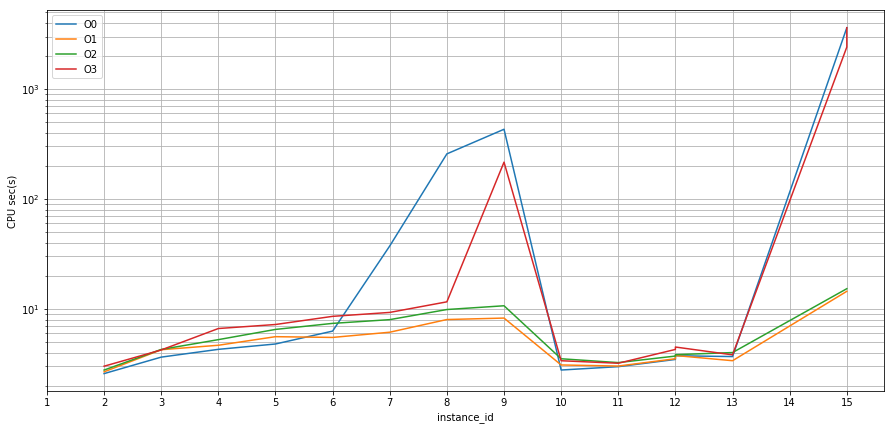

In [47]:
#Taken from https://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby#15466103
# plt.subplot(1, 2, 1)
# for key, grp in stdDataClean.sort_values('solutionLength').groupby(['optLevel']):
#     label = "O" + str(int(key))
#     plt.plot(grp['solutionLength'],grp['compTime'], label = label)
#     plt.xlabel('SolutionLength')
#     plt.ylabel('CPU sec(s)')
# plt.legend(loc='best')
# plt.grid()

# plt.subplot(1, 2, 2)
for key, grp in data.sort_values(['instance_id','compTime']).where(data['foundSolution']==False).dropna().groupby(['optLevel']):
    label = "O" + str(int(key))
    plt.semilogy(grp['instance_id'],grp['compTime'], label = label)
    plt.xlabel('instance_id')
    plt.xticks(range(data['instance_id'].min(),data['instance_id'].max()+1))
    plt.ylabel('CPU sec(s)')
plt.legend(loc='best')

plt.grid(True, which="both")
plt.show()

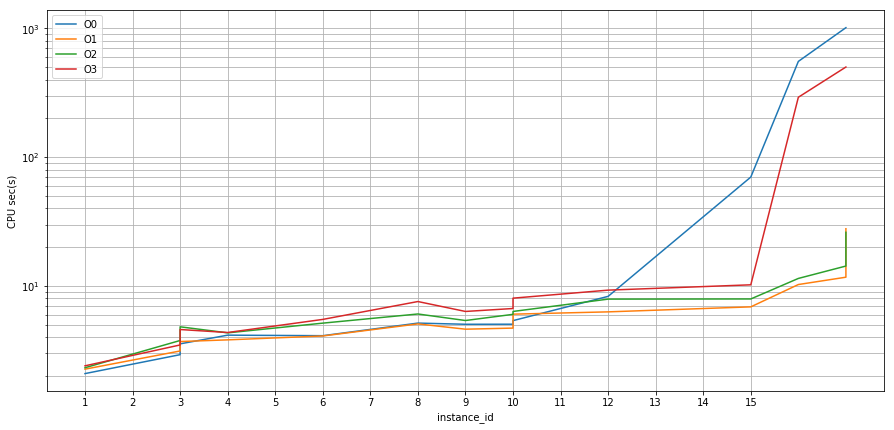

In [36]:
#Taken from https://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby#15466103
# plt.subplot(1, 2, 1)
# for key, grp in stdDataClean.sort_values('solutionLength').groupby(['optLevel']):
#     label = "O" + str(int(key))
#     plt.plot(grp['solutionLength'],grp['compTime'], label = label)
#     plt.xlabel('SolutionLength')
#     plt.ylabel('CPU sec(s)')
# plt.legend(loc='best')
# plt.grid()

# plt.subplot(1, 2, 2)
for key, grp in data.sort_values(['steps','compTime']).where(data['foundSolution']).dropna().groupby(['optLevel']):
    label = "O" + str(int(key))
    plt.semilogy(grp['steps'],grp['compTime'], label = label)
    plt.xlabel('instance_id')
    plt.xticks(range(data['instance_id'].min(),data['instance_id'].max()+1))
    plt.ylabel('CPU sec(s)')
plt.legend(loc='best')

plt.grid(True, which="both")
plt.show()

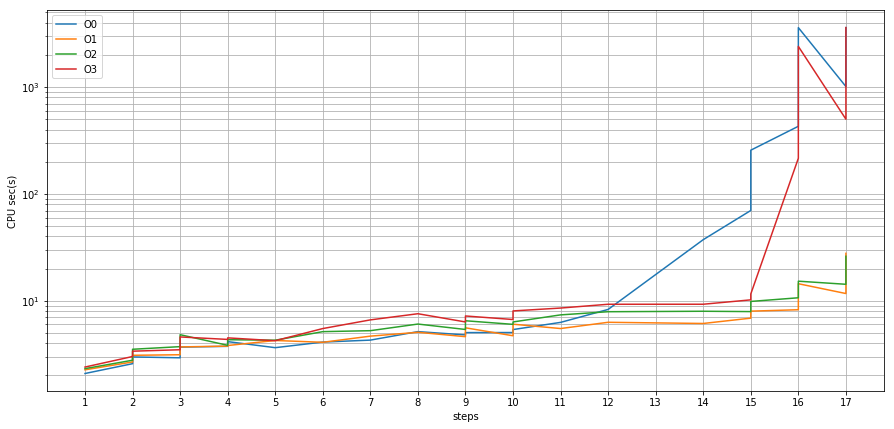

In [37]:
#Taken from https://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby#15466103
# plt.subplot(1, 2, 1)
# for key, grp in stdDataClean.sort_values('solutionLength').groupby(['optLevel']):
#     label = "O" + str(int(key))
#     plt.plot(grp['solutionLength'],grp['compTime'], label = label)
#     plt.xlabel('SolutionLength')
#     plt.ylabel('CPU sec(s)')
# plt.legend(loc='best')
# plt.grid()

# plt.subplot(1, 2, 2)
fig, ax = plt.subplots()
for key, grp in data.sort_values(['steps','compTime']).groupby(['optLevel']):
    label = "O" + str(int(key))
    ax.plot(grp['steps'],grp['compTime'], label = label)
    plt.xlabel('steps')
    plt.xticks(range(data['steps'].min(),data['steps'].max()+1))
    ax.set_yscale('log')
    plt.ylabel('CPU sec(s)')
ax.legend(loc='best')

ax.grid(True, which="both")
plt.show()

In [38]:
shifted = data.sort_values('instance_id').groupby('optLevel').diff(1)
diffCompTimes = shifted.where(shifted['instance_id']==0).dropna()
# diffCompTimes
diffCompTimes['instance_id'] = Series([np.nan for i in range(len(diffCompTimes))])
diffCompTimes['instance_id'].fillna(data['instance_id'],inplace=True)
diffCompTimes
# pd.merge(diffCompTimes, DataFrame(data['instance_id']),left_index=True,right_index=True)

,compTime,foundSolution,instance_id,steps
54,-0.993,True,2.0,-1.0
53,-0.451,True,2.0,-1.0
43,0.472,True,2.0,1.0
40,0.348,True,2.0,1.0
31,1.267,True,3.0,1.0
20,-0.468,True,3.0,-1.0
30,0.867,True,3.0,1.0
21,0.162,True,3.0,-1.0
48,0.862,True,4.0,1.0
61,-0.405,True,4.0,-1.0


     instance_id  steps  optLevel  foundSolution  compTime
40           2.0    1.0       0.0              1  0.118934
28           3.0    1.0       0.0              1  0.113924
48           4.0    1.0       0.0              1  0.167509
0            5.0    1.0       0.0              1  0.108942
44           6.0    1.0       0.0              1  0.243523
8            7.0    1.0       0.0              1  0.466978
32           8.0    1.0       0.0              1  0.536391
12           9.0    1.0       0.0              1  0.575414
84          10.0    1.0       0.0              1  0.217685
112         11.0    1.0       0.0              1  0.135190
92          12.0    1.0       0.0              0  0.074460
108         13.0    1.0       0.0              1  0.112102
68          14.0    1.0       0.0              0  0.001189
100         15.0    1.0       0.0              0  0.000083
     instance_id  steps  optLevel  foundSolution  compTime
41           2.0    1.0       0.0              1  0.1442

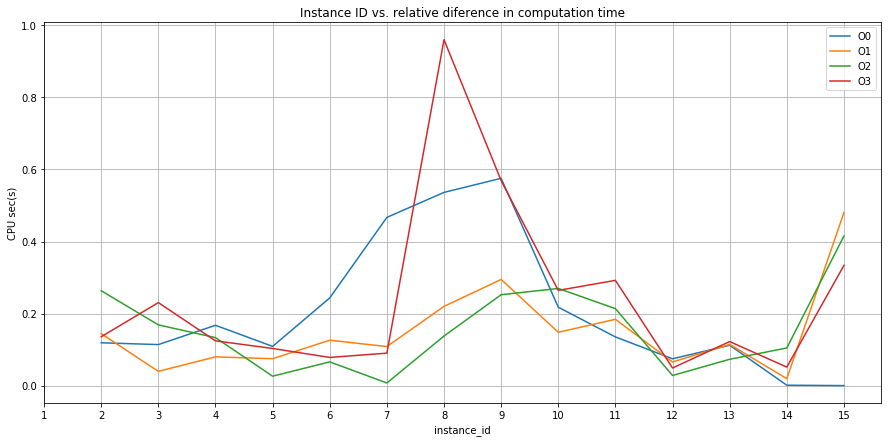

In [48]:
diffCompTimes['instance_id'].fillna(data['instance_id'],inplace=True)
diffCompTimesfig, ax = plt.subplots()
for key, grp in  data.sort_values(['instance_id','steps']).groupby('optLevel'):
    grpDiff = grp.diff(1)
    grpDiff = grpDiff.where(grpDiff['instance_id']==0).dropna().apply(abs)
    grpDiff['instance_id'] = Series([np.nan for i in range(len(grpDiff))])
    grpDiff['instance_id'].fillna(grp['instance_id'],inplace=True)
    grpDiff['compTime'] = grpDiff['compTime']/grp['compTime'] 
    print(grpDiff)
    label = "O" + str(int(key))
    ax.plot(grpDiff['instance_id'],grpDiff['compTime'], label = label)
    plt.xlabel('instance_id')
    plt.xticks(range(data['instance_id'].min(),data['instance_id'].max()+1))
    plt.ylabel('CPU sec(s)')
    plt.legend(loc='best')
    plt.title('Instance ID vs. relative diference in computation time')

ax.grid(True, which="both")
plt.show()

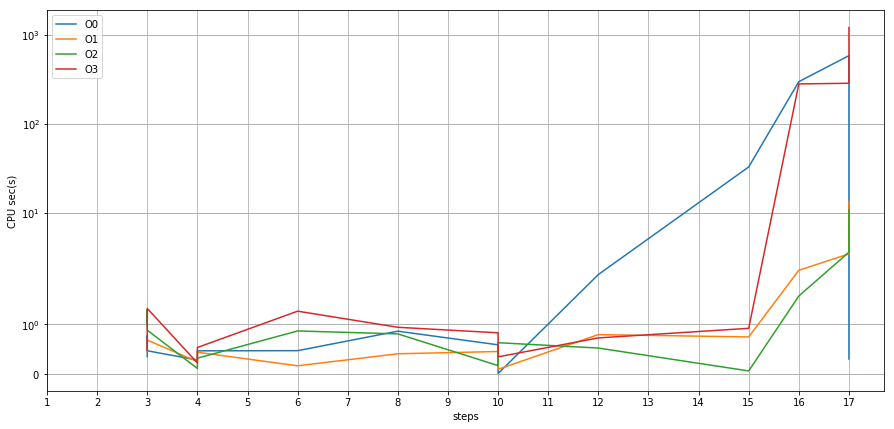

In [40]:
fig, ax = plt.subplots()
for key, grp in  data.sort_values(['instance_id','steps']).groupby('optLevel'):
    grpDiff = grp.diff(1)
    grpDiff = grpDiff.where(grpDiff['instance_id']==0).dropna().apply(abs)
    grpDiff['steps'] = Series([np.nan for i in range(len(grpDiff))])
    grpDiff['steps'].fillna(grp['steps'],inplace=True)
    label = "O" + str(int(key))
    grpDiff.sort_values('steps',inplace=True)
    ax.plot(grpDiff['steps'],grpDiff['compTime'], label = label)
    plt.xlabel('steps')
    ax.set_yscale('symlog')
    plt.xticks(range(data['steps'].min(),data['steps'].max()+1))
    plt.ylabel('CPU sec(s)')
    plt.legend(loc='best')

ax.grid(True, which="both")
plt.show()